In [5]:
import pandas as pd
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}
dataread = pd.DataFrame(data)
print(dataread)

      age  income student credit_rating buys_computer
0    <=30    high      no          fair            no
1    <=30    high      no     excellent            no
2   31…40    high      no          fair           yes
3     >40  medium      no          fair           yes
4     >40     low     yes          fair           yes
5     >40     low     yes     excellent            no
6   31…40     low     yes     excellent           yes
7    <=30  medium      no          fair            no
8    <=30     low     yes          fair           yes
9     >40  medium     yes          fair           yes
10   <=30  medium     yes     excellent           yes
11  31…40  medium      no     excellent           yes
12  31…40    high     yes          fair           yes
13    >40  medium      no     excellent            no


In [6]:
dataread.to_csv('Book1.csv',index=False)

In [7]:
#1
import math
def entropy(attribute):
    values = dataread[attribute].unique()
    entropy = 0
    for value in values:
        p = len(dataread[dataread[attribute] == value]) / len(dataread)
        entropy += -p * math.log2(p)
    return entropy

age_entropy = entropy('age')
income_entropy = entropy('income')
student_entropy = entropy('student')
credit_rating_entropy = entropy('credit_rating')
buys_computer_entropy = entropy('buys_computer')
print('Entropy for Age:', age_entropy)
print('Entropy for Income:', income_entropy)
print('Entropy for Student:', student_entropy)
print('Entropy for Credit Rating:', credit_rating_entropy)
print('Entropy for Buys Computer (Class Label):', buys_computer_entropy)

def information_gain(attribute):
    values = dataread[attribute].unique()
    information_gain = buys_computer_entropy
    for value in values:
        subset = dataread[dataread[attribute] == value]
        p = len(subset) / len(dataread)
        information_gain -= p * entropy('buys_computer')
    return information_gain

age_information_gain = information_gain('age')
income_information_gain = information_gain('income')
student_information_gain = information_gain('student')
credit_rating_information_gain = information_gain('credit_rating')

print('Information Gain for Age:', age_information_gain)
print('Information Gain for Income:', income_information_gain)
print('Information Gain for Student:', student_information_gain)
print('Information Gain for Credit Rating:', credit_rating_information_gain)

root_node = max(age_information_gain, income_information_gain, student_information_gain, credit_rating_information_gain)
if root_node == age_information_gain:
    print('The first feature for constructing the decision tree is Age.')
elif root_node == income_information_gain:
    print('The first feature for constructing the decision tree is Income.')
elif root_node == student_information_gain:
    print('The first feature for constructing the decision tree is Student.')
else:
    print('The first feature for constructing the decision tree is Credit Rating.')



Entropy for Age: 1.5774062828523454
Entropy for Income: 1.5566567074628228
Entropy for Student: 1.0
Entropy for Credit Rating: 0.9852281360342516
Entropy for Buys Computer (Class Label): 0.9402859586706311
Information Gain for Age: 1.1102230246251565e-16
Information Gain for Income: 1.6653345369377348e-16
Information Gain for Student: 0.0
Information Gain for Credit Rating: 1.1102230246251565e-16
The first feature for constructing the decision tree is Income.


In [23]:
#2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
dataread_encoded = dataread.apply(lambda col: pd.factorize(col)[0])
Tr_X = dataread_encoded.drop(columns=['label'])
Tr_y = dataread_encoded['label']
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)
training_accuracy = model.score(Tr_X, Tr_y)
print(f"Training Set Accuracy: {training_accuracy}")
tree_depth = model.get_depth()
print(f"Tree Depth: {tree_depth}")

Training Set Accuracy: 1.0
Tree Depth: 1


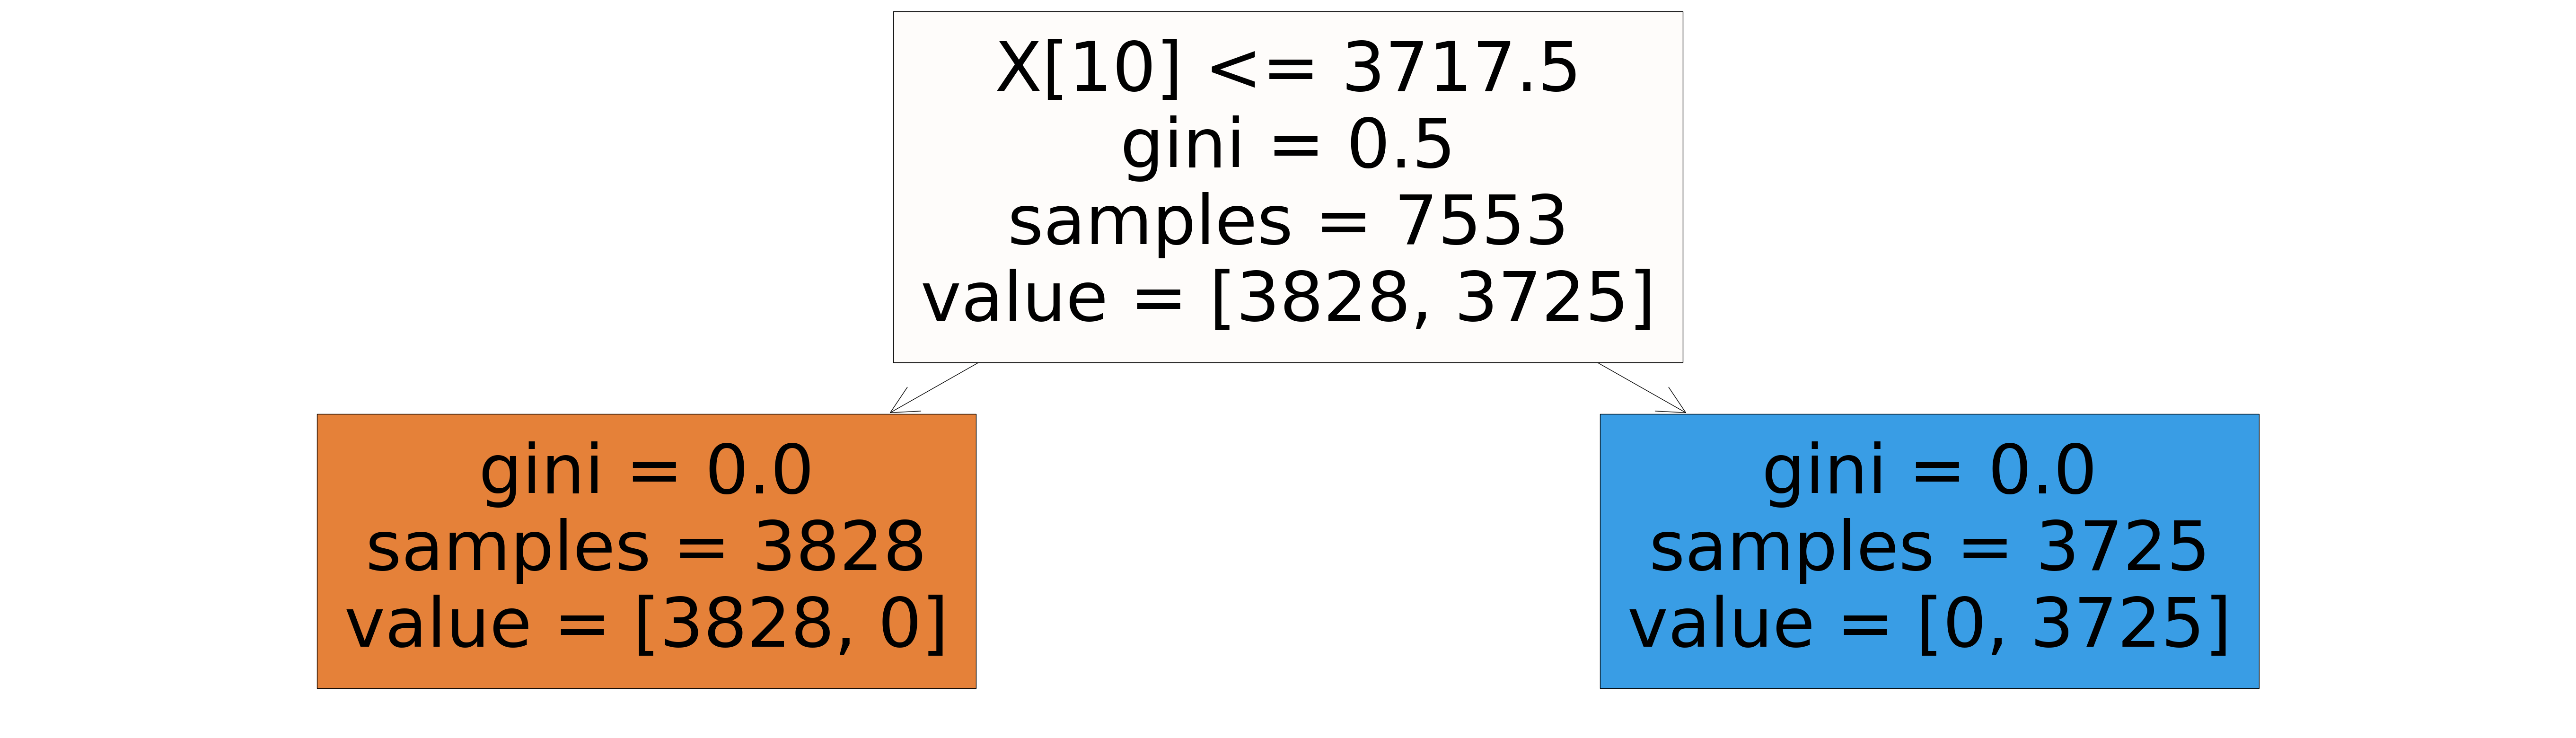

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(70,20))
tree.plot_tree(model, filled=True)
plt.show()

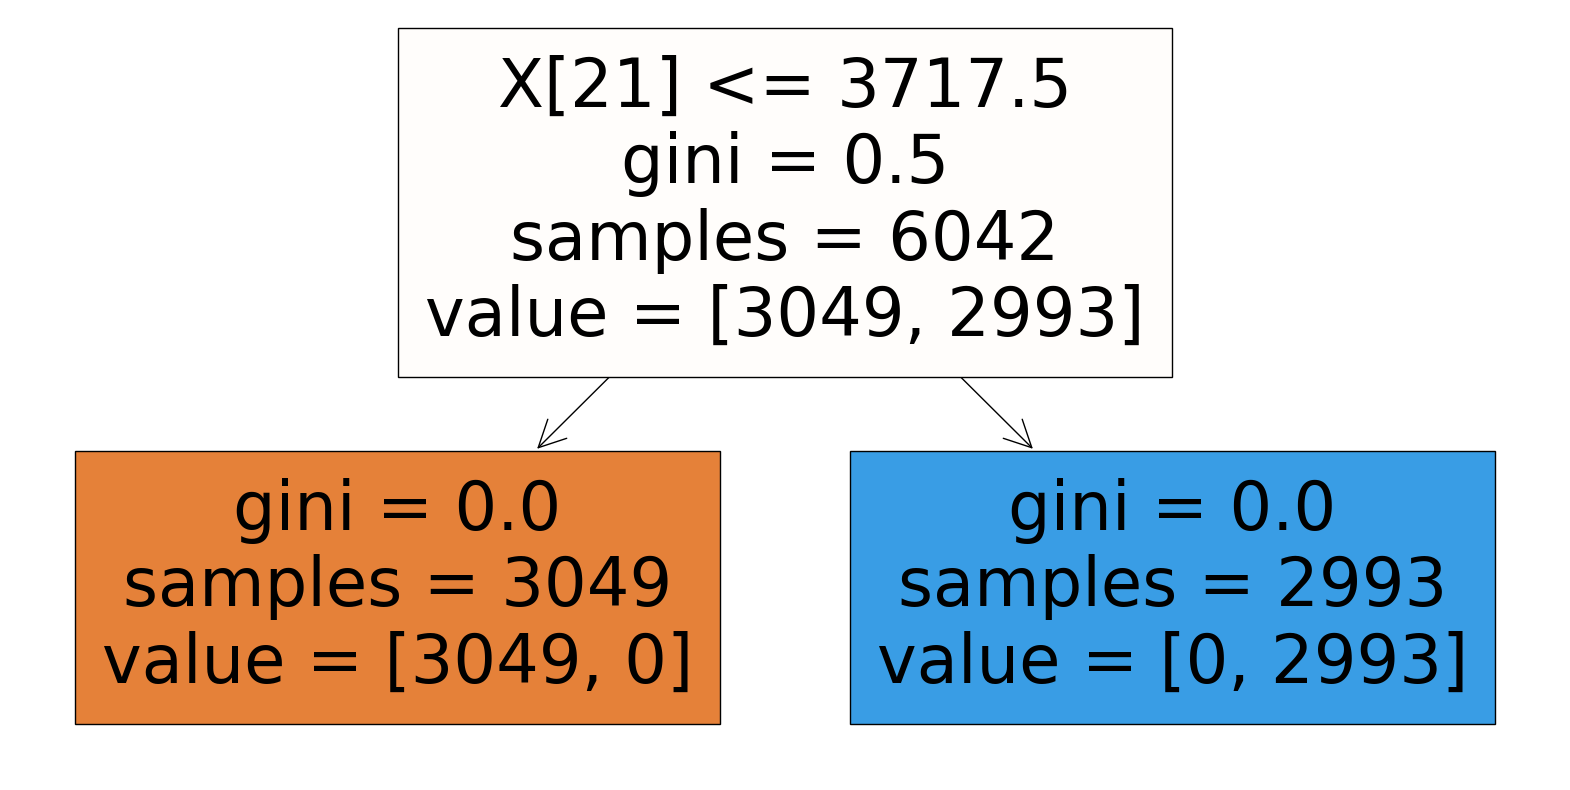

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
dataread = pd.read_excel('dataset_final.xlsx')
dataread_encoded = dataread.apply(lambda col: pd.factorize(col)[0])
X = dataread_encoded.drop('label', axis=1)
y = dataread_encoded['label']
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)
Tr_acc = model.score(Tr_X, Tr_y)
Te_acc = model.score(Te_X, Te_y)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True)
plt.show()

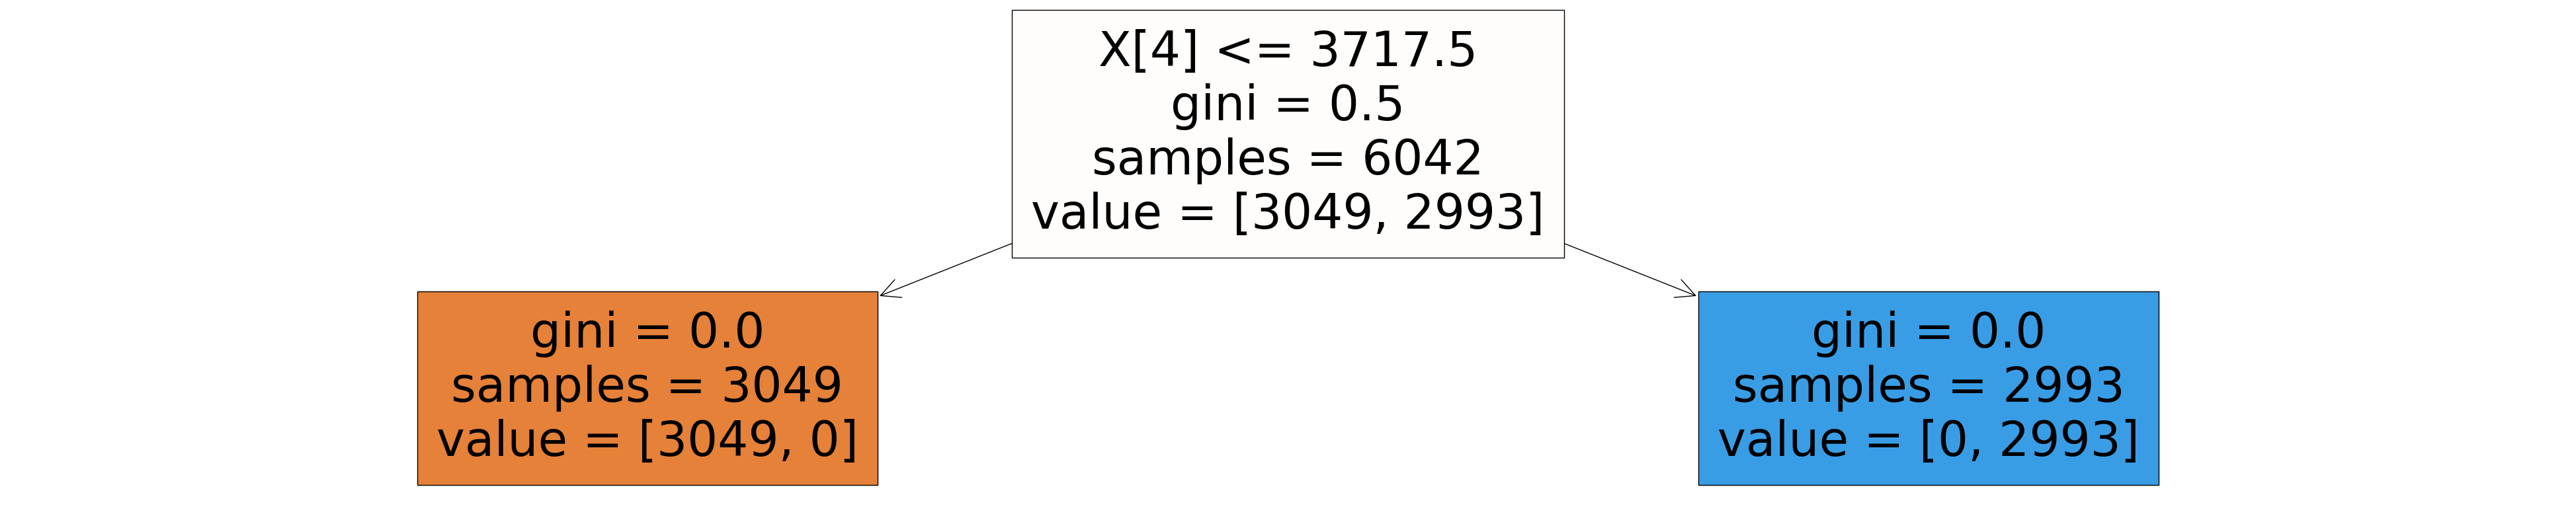

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
dataread = pd.read_excel('dataset_final.xlsx')
dataread_encoded = dataread.apply(lambda col: pd.factorize(col)[0])
X = dataread_encoded.drop('label', axis=1)
y = dataread_encoded['label']
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=5)
model.fit(Tr_X, Tr_y)
Tr_acc = model.score(Tr_X, Tr_y)
Te_acc = model.score(Te_X, Te_y)
plt.figure(figsize=(50, 10))
plot_tree(model, filled=True)
plt.show()

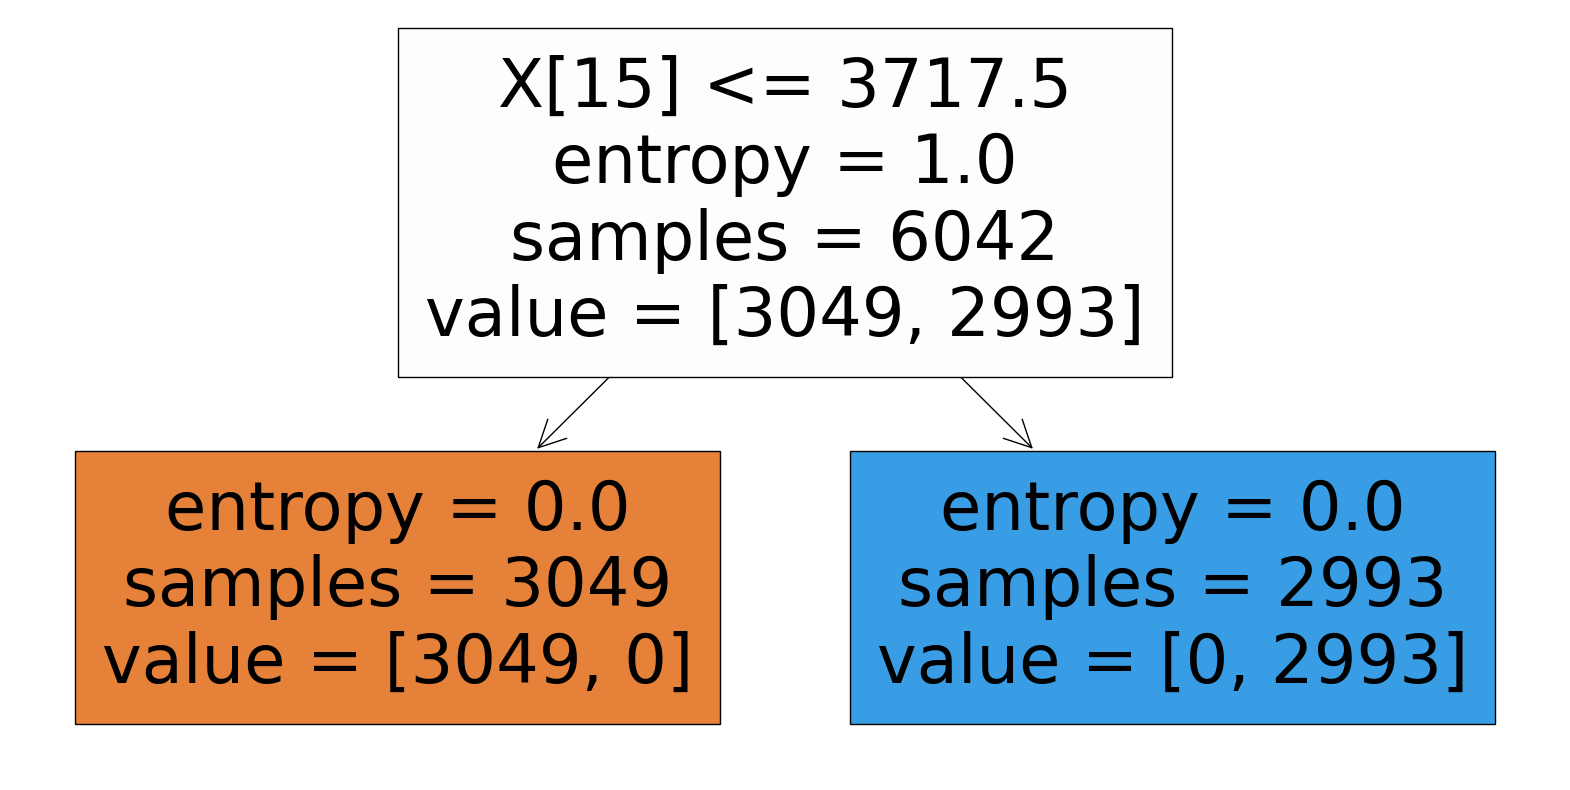

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
dataread = pd.read_excel('dataset_final.xlsx')
dataread_encoded = dataread.apply(lambda col: pd.factorize(col)[0])
X = dataread_encoded.drop('label', axis=1)
y = dataread_encoded['label']
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier with criterion="entropy"
model = DecisionTreeClassifier(criterion="entropy")
model.fit(Tr_X, Tr_y)
Tr_acc = model.score(Tr_X, Tr_y)
Te_acc = model.score(Te_X, Te_y)
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True)
plt.show()

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dataread = pd.read_excel('dataset_final.xlsx')
dataread_encoded = dataread.apply(lambda col: pd.factorize(col)[0])
X = dataread_encoded.drop('label', axis=1)
y = dataread_encoded['label']
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier()
dt_model.fit(Tr_X, Tr_y)


dt_y_pred = dt_model.predict(Te_X)
dt_acc = accuracy_score(Te_y, dt_y_pred)
dt_prec = precision_score(Te_y, dt_y_pred, average='weighted')
dt_rec = recall_score(Te_y, dt_y_pred, average='weighted')
dt_f1 = f1_score(Te_y, dt_y_pred, average='weighted')

rf_model = RandomForestClassifier()
rf_model.fit(Tr_X, Tr_y)


rf_y_pred = rf_model.predict(Te_X)
rf_acc = accuracy_score(Te_y, rf_y_pred)
rf_prec = precision_score(Te_y, rf_y_pred, average='weighted')
rf_rec = recall_score(Te_y, rf_y_pred, average='weighted')
rf_f1 = f1_score(Te_y, rf_y_pred, average='weighted')

print("---------------------DECISION TREE CLASSIFIER-----------------")
print("Decision Tree classifier:")
print("Accuracy:", dt_acc)
print("Precision:", dt_prec)
print("Recall:", dt_rec)
print("F1-score:", dt_f1)
print()
print("---------------------RANDOM FOREST CLASSIFIER-----------------")
print("Random Forest classifier:")
print("Accuracy:", rf_acc)
print("Precision:", rf_prec)
print("Recall:", rf_rec)
print("F1-score:", rf_f1)

---------------------DECISION TREE CLASSIFIER-----------------
Decision Tree classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

---------------------RANDOM FOREST CLASSIFIER-----------------
Random Forest classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

dataread = pd.read_excel('dataset_final.xlsx')
dataread_encoded = dataread.apply(lambda col: pd.factorize(col)[0])
X = dataread_encoded.drop('label', axis=1)
y = dataread_encoded['label']
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')
model.fit(Tr_X, Tr_y)


print("Number of trees:", len(model.estimators_))
print("Classes:", model.classes_)
print("Number of classes:", model.n_classes_)
print("Feature importances:", model.feature_importances_)

Number of trees: 100
Classes: [0 1]
Number of classes: 2
Feature importances: [0.07 0.04 0.09 0.02 0.04 0.04 0.05 0.05 0.05 0.04 0.07 0.09 0.08 0.05
 0.02 0.06 0.03 0.   0.   0.   0.   0.03 0.03 0.02 0.03]
